<a href="https://colab.research.google.com/github/shreevigneshs/UCSC-220/blob/main/assignments/220_assignment_1_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
csv_path = "/content/drive/MyDrive/NLP220/assignments/IMDB Dataset.csv"

In [3]:
df = pd.read_csv(csv_path, encoding='utf-8')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# it looks like there are some html texts in the text

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['review'] = df['review'].apply(strip_html)

In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
random_state = 20221013
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=0.1, random_state=random_state, shuffle=True)

In [9]:
data={"count": [len([1 for _y in y_train if _y == 'positive']), len([1 for _y in y_train if _y == 'negative']), len([1 for _y in y_test if _y == 'positive']), len([1 for _y in y_test if _y == 'negative'])], "sentiment": ["positive", "negative"] * 2, "split": ["train", "train", "test", "test"]}
split_df = pd.DataFrame(columns=["sentiment", "count", "split"], data=data)

In [10]:
split_df

,sentiment,count,split
0,positive,22471,train
1,negative,22529,train
2,positive,2529,test
3,negative,2471,test


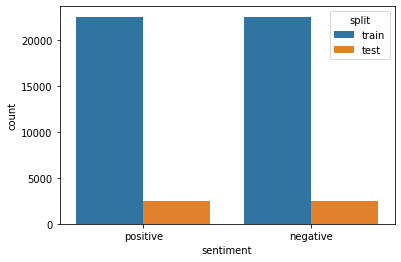

In [11]:
import seaborn as sns

sns.barplot(data=split_df, x="sentiment", y="count", hue="split")

In [12]:
# # we split such that we get 0.2 val data as mentioned in the assignemnt
# # now since the data is 0.8 of the whole value so we use 0.12 as the split ratio since 0.12 x 0.9 ~ 0.1
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state, shuffle=True)


In [13]:
# feature engineering 1 = Count Vectorizer
# feature engineering 2 = TF-IDF
# feature engineering 3 = TF-IDF with ngrams = (1, 2)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn import metrics

# multimodal naive bayes

pipeline_1 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

pipeline_2 = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

pipeline_3 = Pipeline(
    [
        ("vect", TfidfVectorizer(ngram_range=(1,2))),
        ("clf", MultinomialNB()),
    ]
)

# svm

pipeline_4 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("clf", svm.SVC()),
    ]
)

pipeline_5 = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", svm.SVC()),
    ]
)

pipeline_6 = Pipeline(
    [
        ("vect", TfidfVectorizer(ngram_range=(1,2))),
        ("clf", svm.SVC()),
    ]
)

In [45]:
# for naive bayes

pipeline_1.fit(X_train, y_train)
predicted_1 = pipeline_1.predict(X_test)
print("Classification Report Pipeline 1 (Count Vectorizer + Naive Bayes)")
print("Avg Accuracy: {}".format(np.mean(predicted_1 == y_test)))
print(metrics.classification_report(y_test, predicted_1))

pipeline_2.fit(X_train, y_train)
predicted_2 = pipeline_2.predict(X_test)
print("Classification Report Pipeline 1 (TF-IDF + Naive Bayes)")
print("Avg Accuracy: {}".format(np.mean(predicted_2 == y_test)))
print(metrics.classification_report(y_test, predicted_2))

pipeline_3.fit(X_train, y_train)
predicted_3 = pipeline_3.predict(X_test)
print("Classification Report Pipeline 2 (TF-IDF with ngram range (1,2) + Naive Bayes)")
print("Avg Accuracy: {}".format(np.mean(predicted_3 == y_test)))
print(metrics.classification_report(y_test, predicted_3))



Classification Report Pipeline 1 (Count Vectorizer + Naive Bayes)
Avg Accuracy: 0.8474
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      2471
    positive       0.88      0.81      0.84      2529

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

Classification Report Pipeline 1 (TFIDF + Naive Bayes)
Avg Accuracy: 0.8636
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      2471
    positive       0.89      0.84      0.86      2529

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

Classification Report Pipeline 2 (TFIDF with ngram-(1,2) + Naive Bayes)
Avg Accuracy: 0.8902
              precision    recall  f1-score   support

    negative       0.87      0.91  

In [ ]:
# For multinomial naive bayes we see that of the 3 feature engineering techniques, technique 3 (TF-IDF with ngrams (1,2)) performs best with an accuracy of 0.89.
# Feature engineering technique 2 (vanilla TF-IDF) performs marginally better than feature engineering 1 (Count Vectorizer).
# Overall Technique 3 accuracy (0.89) > Technique 2 accuracy (0.86) > Technique 1 accuracy (0.85)

In [ ]:
# for svm

pipeline_4.fit(X_train, y_train)
predicted_4 = pipeline_4.predict(X_test)
print("Classification Report Pipeline 4 (Count Vectorizer + SVM)")
print("Avg Accuracy: {}".format(np.mean(predicted_4 == y_test)))
print(metrics.classification_report(y_test, predicted_4))

Classification Report Pipeline 4 (Count Vectorizer + SVM)
Avg Accuracy: 0.8848
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      2471
    positive       0.88      0.90      0.89      2529

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [14]:
pipeline_5.fit(X_train, y_train)
predicted_5 = pipeline_5.predict(X_test)
print("Classification Report Pipeline 5 (TF-IDF + SVM)")
print("Avg Accuracy: {}".format(np.mean(predicted_5 == y_test)))
print(metrics.classification_report(y_test, predicted_5))

Classification Report Pipeline 5 (TF-IDF + SVM)
Avg Accuracy: 0.9116
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91      2471
    positive       0.91      0.92      0.91      2529

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [16]:
# with less data so it trains faster
# X_train = X_train[:10000]
# y_train = y_train[:10000]

pipeline_6.fit(X_train, y_train)
predicted_6 = pipeline_6.predict(X_test)
print("Classification Report Pipeline 6 (TF-IDF with ngram range (1,2) + SVM)")
print("Avg Accuracy: {}".format(np.mean(predicted_6 == y_test)))
print(metrics.classification_report(y_test, predicted_6))

Classification Report Pipeline 6 (TF-IDF with ngram range (1,2) + SVM)
Avg Accuracy: 0.889
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      2471
    positive       0.88      0.90      0.89      2529

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [18]:
# with all data
# as we can see the results are a lot better

pipeline_6.fit(X_train, y_train)
predicted_6 = pipeline_6.predict(X_test)
print("Classification Report Pipeline 6 (TF-IDF with ngram range (1,2) + SVM)")
print("Avg Accuracy: {}".format(np.mean(predicted_6 == y_test)))
print(metrics.classification_report(y_test, predicted_6))

Classification Report Pipeline 6 (TF-IDF with ngram range (1,2) + SVM)
Avg Accuracy: 0.9178
              precision    recall  f1-score   support

    negative       0.93      0.91      0.92      2471
    positive       0.91      0.93      0.92      2529

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

